In [147]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [148]:
df1= pd.read_csv(r"C:\Users\HIMANSHU VIRWANI\Desktop\New folder\ecommerce_customer_data_custom_ratios.csv")

In [149]:
df2 = pd.read_csv(r"C:\Users\HIMANSHU VIRWANI\Desktop\New folder\internet_service_churn.csv")

In [150]:
df1.head()

,Customer_id,Purchase_Date,Product_Category,Product_ Price,Quantity,Total_Purchase_Amount,Payment_Method,Customer_Age,Returns,Customer_Name,Age,Gender,Churn
0,1,19-07-2023,Books,169,5,3491,PayPal,70,1.0,Nicole Johnson,70,Male,0
1,2,05-03-2021,Books,144,1,4210,PayPal,27,1.0,Marie Wright,27,Female,0
2,2,19-09-2021,Books,98,4,959,PayPal,27,NaN,Marie Wright,27,Female,0
3,2,21-11-2022,Electronics,178,3,2819,PayPal,27,0.0,Marie Wright,27,Female,0
4,3,22-05-2021,Books,132,5,4735,Credit Card,23,1.0,Julie Wolfe,23,Female,0


In [151]:
df2.head()

,Customer_id,Is_tv_subscriber,Is_movie_package_subscriber,Subscription_age,Bill_avg,Remaining_contract,Service_failure_count,Download_average,Upload_average,Download_over_limit,Churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [152]:
print("\nMissing values in Dataset 1:") 
print(df1.isnull().sum())
print("\nMissing values in Dataset 2:") 
print(df2.isnull().sum())


Missing values in Dataset 1:
Customer_id                  0
Purchase_Date                0
Product_Category             0
Product_ Price               0
Quantity                     0
Total_Purchase_Amount        0
Payment_Method               0
Customer_Age                 0
Returns                  47596
Customer_Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

Missing values in Dataset 2:
Customer_id                        0
Is_tv_subscriber                   0
Is_movie_package_subscriber        0
Subscription_age                   0
Bill_avg                           0
Remaining_contract             21572
Service_failure_count              0
Download_average                 381
Upload_average                   381
Download_over_limit                0
Churn                              0
dtype: int64


In [153]:
df1.drop(columns=['Returns'], inplace = True)
df2.drop(columns=['Remaining_contract'], inplace = True)


In [154]:
print(df1.columns)
print(df2.columns)


Index(['Customer_id', 'Purchase_Date', 'Product_Category', 'Product_ Price',
       'Quantity', 'Total_Purchase_Amount', 'Payment_Method', 'Customer_Age',
       'Customer_Name', 'Age', 'Gender', 'Churn'],
      dtype='object')
Index(['Customer_id', 'Is_tv_subscriber', 'Is_movie_package_subscriber',
       'Subscription_age', 'Bill_avg', 'Service_failure_count',
       'Download_average', 'Upload_average', 'Download_over_limit', 'Churn'],
      dtype='object')


In [155]:
df2['Download_average'].fillna(df2['Download_average'].median(), inplace = True)
df2['Upload_average'].fillna(df2['Upload_average'].median(), inplace = True)

print(df2[['Download_average', 'Upload_average']].head())


   Download_average  Upload_average
0               8.4             2.3
1               0.0             0.0
2              13.7             0.9
3               0.0             0.0
4               0.0             0.0


C:\Users\HIMANSHU VIRWANI\AppData\Local\Temp\ipykernel_18108\173642294.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Download_average'].fillna(df2['Download_average'].median(), inplace = True)
C:\Users\HIMANSHU VIRWANI\AppData\Local\Temp\ipykernel_18108\173642294.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

In [156]:
print("\nMissing values in Dataset 1:") 
print(df1.isnull().sum())
print("\nMissing values in Dataset 2:") 
print(df2.isnull().sum())


Missing values in Dataset 1:
Customer_id              0
Purchase_Date            0
Product_Category         0
Product_ Price           0
Quantity                 0
Total_Purchase_Amount    0
Payment_Method           0
Customer_Age             0
Customer_Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

Missing values in Dataset 2:
Customer_id                    0
Is_tv_subscriber               0
Is_movie_package_subscriber    0
Subscription_age               0
Bill_avg                       0
Service_failure_count          0
Download_average               0
Upload_average                 0
Download_over_limit            0
Churn                          0
dtype: int64


In [157]:
merged_data = pd.merge(df2, df1, on='Customer_id')

In [158]:
merged_data.drop(columns=['Age'], inplace = True)

In [159]:
merged_data.head(100)

,Customer_id,Is_tv_subscriber,Is_movie_package_subscriber,Subscription_age,Bill_avg,Service_failure_count,Download_average,Upload_average,Download_over_limit,Churn_x,Purchase_Date,Product_Category,Product_ Price,Quantity,Total_Purchase_Amount,Payment_Method,Customer_Age,Customer_Name,Gender,Churn_y
0,15,1,0,11.95,25,0,8.4,2.3,0,0,07-05-2022,Electronics,416,4,4680,Credit Card,64,Heather Jimenez,Male,0
1,15,1,0,11.95,25,0,8.4,2.3,0,0,08-09-2021,Clothing,196,2,4412,PayPal,64,Heather Jimenez,Male,0
2,15,1,0,11.95,25,0,8.4,2.3,0,0,05-06-2023,Books,186,3,959,Cash,64,Heather Jimenez,Male,0
3,15,1,0,11.95,25,0,8.4,2.3,0,0,29-10-2020,Books,311,4,4423,Credit Card,64,Heather Jimenez,Male,0
4,15,1,0,11.95,25,0,8.4,2.3,0,0,28-08-2020,Clothing,106,3,5274,Credit Card,64,Heather Jimenez,Male,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,530,0,0,5.95,0,0,0.0,0.0,0,1,01-12-2021,Clothing,411,1,1073,Cash,55,Michael Hughes,Female,0
96,530,0,0,5.95,0,0,0.0,0.0,0,1,24-03-2023,Home,235,2,1329,PayPal,55,Michael Hughes,Female,0
97,530,0,0,5.95,0,0,0.0,0.0,0,1,18-07-2023,Books,359,4,877,Credit Card,55,Michael Hughes,Female,0
98,530,0,0,5.95,0,0,0.0,0.0,0,1,20-02-2021,Electronics,223,5,1234,PayPal,55,Michael Hughes,Female,0


In [160]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10971 entries, 0 to 10970
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_id                  10971 non-null  int64  
 1   Is_tv_subscriber             10971 non-null  int64  
 2   Is_movie_package_subscriber  10971 non-null  int64  
 3   Subscription_age             10971 non-null  float64
 4   Bill_avg                     10971 non-null  int64  
 5   Service_failure_count        10971 non-null  int64  
 6   Download_average             10971 non-null  float64
 7   Upload_average               10971 non-null  float64
 8   Download_over_limit          10971 non-null  int64  
 9   Churn_x                      10971 non-null  int64  
 10  Purchase_Date                10971 non-null  object 
 11  Product_Category             10971 non-null  object 
 12  Product_ Price               10971 non-null  int64  
 13  Quantity        

In [161]:
merged_data.shape

(10971, 20)

In [162]:
merged_data.describe()

,Customer_id,Is_tv_subscriber,Is_movie_package_subscriber,Subscription_age,Bill_avg,Service_failure_count,Download_average,Upload_average,Download_over_limit,Churn_x,Product_ Price,Quantity,Total_Purchase_Amount,Customer_Age,Churn_y
count,10971.000000,10971.000000,10971.000000,10971.000000,10971.000000,10971.000000,10971.000000,10971.000000,10971.000000,10971.000000,10971.000000,10971.000000,10971.000000,10971.000000,10971.000000
mean,24657.285024,0.560478,0.241819,6.339167,15.693738,0.343086,21.355255,1.895169,0.598031,0.788716,254.486191,2.988242,2724.722268,43.803573,0.206636
std,14453.714850,0.496352,0.428205,2.908513,13.306159,0.997838,56.414195,5.226467,1.681887,0.408238,141.517095,1.409613,1438.707990,15.283614,0.404910
min,15.000000,0.000000,0.000000,1.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,106.000000,18.000000,0.000000
25%,12184.000000,0.000000,0.000000,3.750000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,132.000000,2.000000,1481.000000,30.000000,0.000000
50%,24597.000000,1.000000,0.000000,5.790000,15.000000,0.000000,0.300000,0.000000,0.000000,1.000000,255.000000,3.000000,2706.000000,44.000000,0.000000
75%,37242.000000,1.000000,0.000000,8.900000,22.000000,0.000000,19.400000,1.800000,0.000000,1.000000,378.000000,4.000000,3969.500000,57.000000,0.000000
max,49969.000000,1.000000,1.000000,12.800000,162.000000,13.000000,1140.300000,66.100000,7.000000,1.000000,500.000000,5.000000,5350.000000,70.000000,1.000000


In [163]:
# Assuming merged_df is your merged dataset 
# Export merged_df to an Excel file 
merged_data.to_excel('merged_data.xlsx', index=False) 
print("Data exported successfully to 'merged_data.xlsx'")

Data exported successfully to 'merged_data.xlsx'


In [164]:
df1['Source'] = 'ecommerce_data'
df2['Source'] = 'isp_data'

In [165]:
combined_source = pd.concat([df1, df2], ignore_index=True)

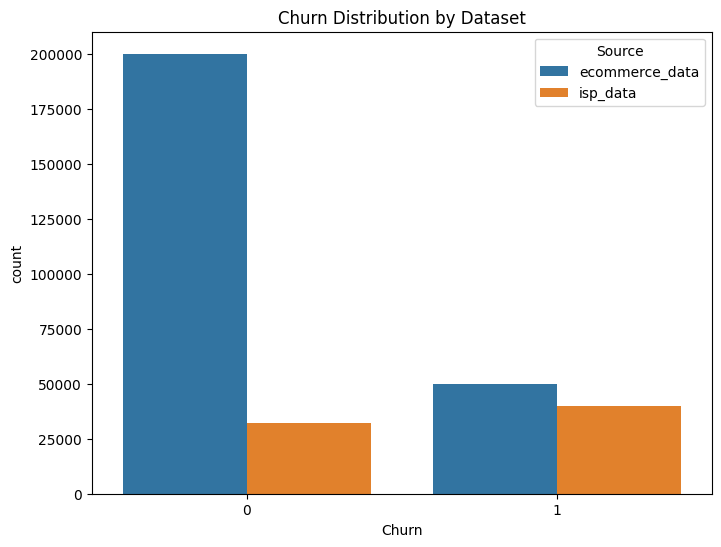

In [216]:
# 1. Churn distribution across datasets
plt.figure(figsize=(8, 6))
sns.countplot(data=combined_source, x='Churn', hue='Source')
plt.title('Churn Distribution by Dataset')
output_path = r"C:\Users\HIMANSHU VIRWANI\Desktop\Semi and Unstructured Data/churn distribution.png" 
plt.savefig(output_path)
plt.show()


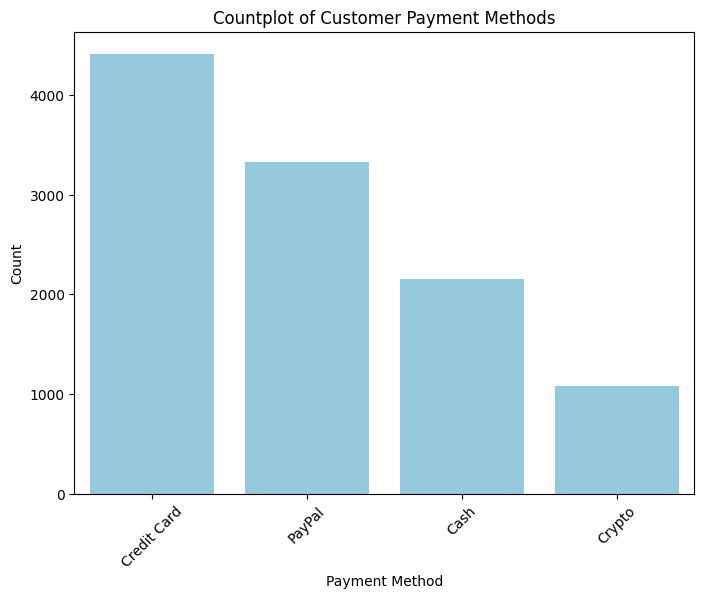

In [218]:
# Plot the countplot for Payment Method
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_data, x='Payment_Method',color="skyblue")
plt.title('Countplot of Customer Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
output_path = r"C:\Users\HIMANSHU VIRWANI\Desktop\Semi and Unstructured Data/Payment method.png" 
plt.savefig(output_path)
# Optional: Rotate x-axis labels for better readability if there are many payment methods
plt.xticks(rotation=45)

plt.show()


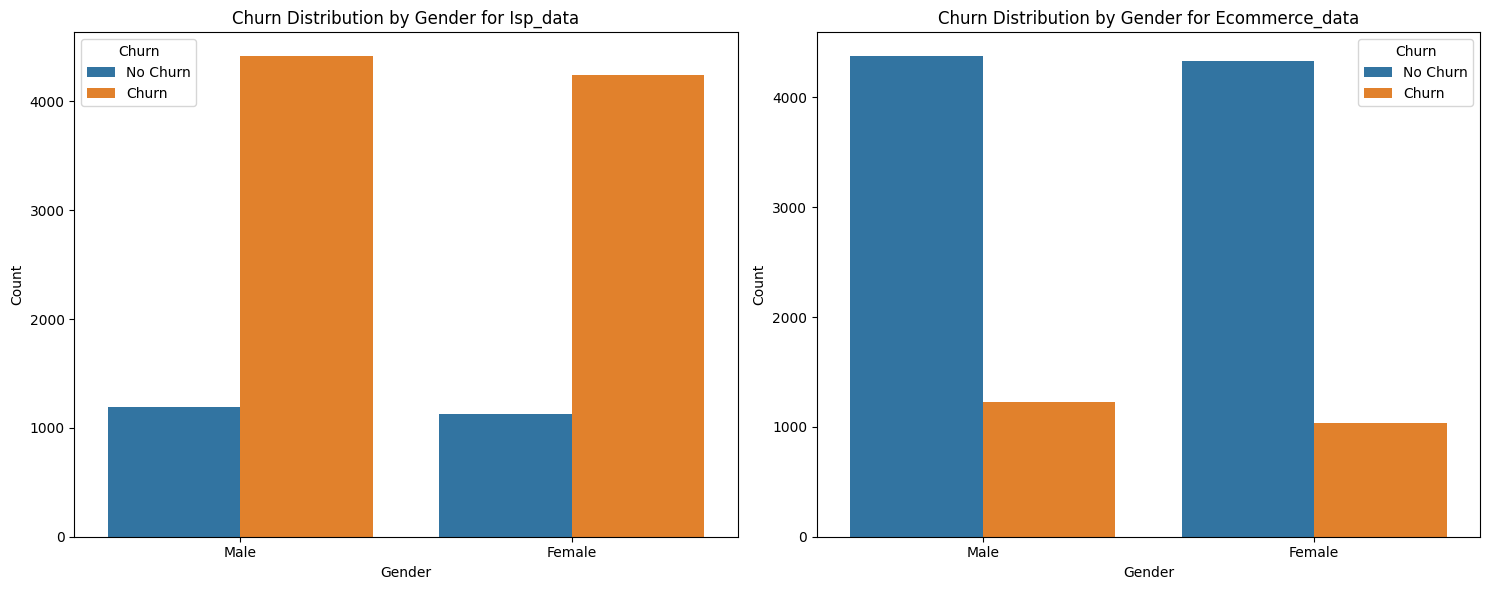

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Churn Distribution based on gender from Isp_data
sns.countplot(data=merged_data, x='Gender', hue='Churn_x', ax=axes[0])
axes[0].set_title('Churn Distribution by Gender for Isp_data')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].legend(title='Churn', loc='upper left', labels=['No Churn', 'Churn'])

# Churn Distribution based on gender from Ecommerce_data
sns.countplot(data=merged_data, x='Gender', hue='Churn_y', ax=axes[1])
axes[1].set_title('Churn Distribution by Gender for Ecommerce_data')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
output_path = r"C:\Users\HIMANSHU VIRWANI\Desktop\Semi and Unstructured Data/churn distribution by gender.png" 
plt.savefig(output_path)
# Adjust layout

plt.tight_layout()
plt.show()


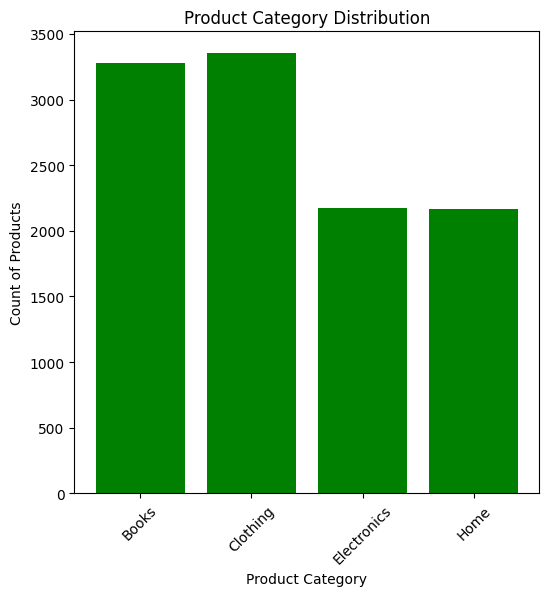

In [240]:
category_data = merged_data.groupby('Product_Category').size().reset_index(name='Count')
# Plotting Product_Category vs Count as a bar graph
plt.figure(figsize=(6, 6))
plt.bar(category_data['Product_Category'], category_data['Count'], color='green')
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count of Products')
plt.xticks(rotation=45)
output_path = r"C:\Users\HIMANSHU VIRWANI\Desktop\Semi and Unstructured Data/product category.png" 
plt.savefig(output_path)
plt.show()



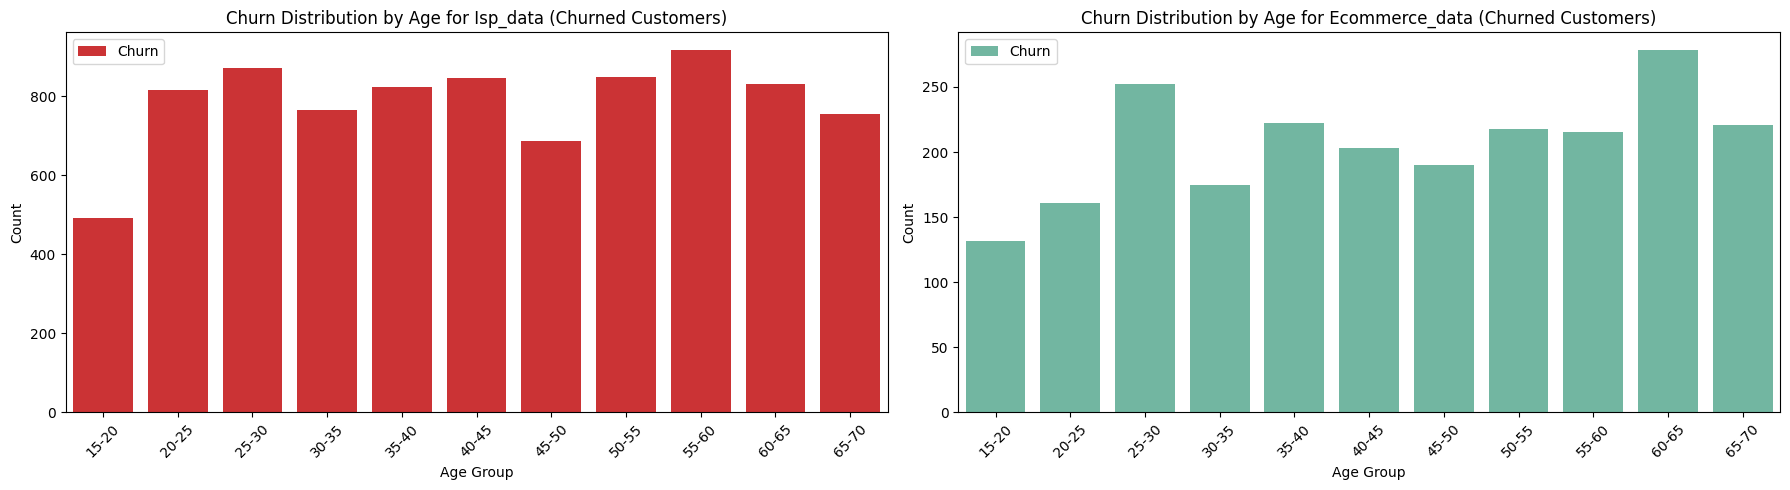

In [242]:
# Defining custom age bins
bins = [ 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
labels = [ '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70']
merged_data['Age_Group'] = pd.cut(merged_data['Customer_Age'], bins=bins, labels=labels)

# Filtering the data for churned customers only
churned_data_x = merged_data[merged_data['Churn_x'] == 1]
churned_data_y = merged_data[merged_data['Churn_y'] == 1]

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Churn Distribution based on age group from dataset 1 (churned customers only) with bright colors
sns.countplot(data=churned_data_x, x='Age_Group', hue='Churn_x', ax=axes[0], palette='Set1')
axes[0].set_title('Churn Distribution by Age for Isp_data (Churned Customers)')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')
axes[0].legend( loc='upper left', labels=['Churn'])
axes[0].tick_params(axis='x', rotation=45)

# Churn Distribution based on age group from dataset 2 (churned customers only) with bright colors
sns.countplot(data=churned_data_y, x='Age_Group', hue='Churn_y', ax=axes[1], palette='Set2')
axes[1].set_title('Churn Distribution by Age for Ecommerce_data (Churned Customers)')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')
axes[1].legend( loc='upper left', labels=['Churn'])
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
output_path = r"C:\Users\HIMANSHU VIRWANI\Desktop\Semi and Unstructured Data/churn distribution by age.png" 
plt.savefig(output_path)
plt.show()


In [182]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Selecting columns for one-hot encoding (excluding Customer_ID and any non-relevant columns)
categorical_columns = merged_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('Customer_Name')
categorical_columns.remove('Purchase_Date')

# Defining the feature matrix X and the target variable y
X = merged_data.drop(['Churn_x', 'Churn_y', 'Customer_id', 'Customer_Name'], axis=1)
y_x = merged_data['Churn_x']
y_y = merged_data['Churn_y']

# Defining the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['float64', 'int64']).columns.tolist()),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

# Splitting the data into training and testing sets
X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(X, y_x, test_size=0.2, random_state=42)
X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(X, y_y, test_size=0.2, random_state=42)

# Preprocessing the data
X_train_x = preprocessor.fit_transform(X_train_x)
X_test_x = preprocessor.transform(X_test_x)
X_train_y = preprocessor.fit_transform(X_train_y)
X_test_y = preprocessor.transform(X_test_y)


In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Random Forest for dataset 1
rf_x = RandomForestClassifier(random_state=42)
rf_x.fit(X_train_x, y_train_x)
y_pred_x = rf_x.predict(X_test_x)
print("Random Forest - Isp_data")
print(classification_report(y_test_x, y_pred_x))

# Random Forest for dataset 2
rf_y = RandomForestClassifier(random_state=42)
rf_y.fit(X_train_y, y_train_y)
y_pred_y = rf_y.predict(X_test_y)
print("Random Forest - Ecommerce_data")
print(classification_report(y_test_y, y_pred_y))


Random Forest - Isp_data
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       463
           1       1.00      0.99      1.00      1732

    accuracy                           0.99      2195
   macro avg       0.98      0.99      0.99      2195
weighted avg       0.99      0.99      0.99      2195

Random Forest - Ecommerce_data
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1713
           1       1.00      0.46      0.63       482

    accuracy                           0.88      2195
   macro avg       0.93      0.73      0.78      2195
weighted avg       0.90      0.88      0.86      2195



In [186]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting for dataset 1
gb_x = GradientBoostingClassifier(random_state=42)
gb_x.fit(X_train_x, y_train_x)
y_pred_x = gb_x.predict(X_test_x)
print("Gradient Boosting Machine - Isp_data")
print(classification_report(y_test_x, y_pred_x))

# Gradient Boosting for dataset 2
gb_y = GradientBoostingClassifier(random_state=42)
gb_y.fit(X_train_y, y_train_y)
y_pred_y = gb_y.predict(X_test_y)
print("Gradient Boosting Machine - Ecommerce_data")
print(classification_report(y_test_y, y_pred_y))


Gradient Boosting Machine - Isp_data
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       463
           1       0.99      0.97      0.98      1732

    accuracy                           0.97      2195
   macro avg       0.94      0.97      0.95      2195
weighted avg       0.97      0.97      0.97      2195

Gradient Boosting Machine - Ecommerce_data
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1713
           1       0.94      0.07      0.13       482

    accuracy                           0.79      2195
   macro avg       0.87      0.53      0.51      2195
weighted avg       0.83      0.79      0.72      2195



In [188]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression for dataset 1
lr_x = LogisticRegression(random_state=42)
lr_x.fit(X_train_x, y_train_x)
y_pred_x = lr_x.predict(X_test_x)
print("Logistic Regression - Isp_data")
print(classification_report(y_test_x, y_pred_x))

# Logistic Regression for dataset 2
lr_y = LogisticRegression(random_state=42)
lr_y.fit(X_train_y, y_train_y)
y_pred_y = lr_y.predict(X_test_y)
print("Logistic Regression - Ecommerce_data")
print(classification_report(y_test_y, y_pred_y))


Logistic Regression - Isp_data
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       463
           1       0.95      0.95      0.95      1732

    accuracy                           0.92      2195
   macro avg       0.87      0.87      0.87      2195
weighted avg       0.92      0.92      0.92      2195

Logistic Regression - Ecommerce_data
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1713
           1       0.00      0.00      0.00       482

    accuracy                           0.78      2195
   macro avg       0.39      0.50      0.44      2195
weighted avg       0.61      0.78      0.68      2195



C:\Users\HIMANSHU VIRWANI\Anacoda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HIMANSHU VIRWANI\Anacoda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HIMANSHU VIRWANI\Anacoda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [190]:
from sklearn.svm import SVC

# Support Vector Machine for dataset 1
svm_x = SVC(random_state=42)
svm_x.fit(X_train_x, y_train_x)
y_pred_x = svm_x.predict(X_test_x)
print("Support Vector Machine - Isp_data")
print(classification_report(y_test_x, y_pred_x))

# Support Vector Machine for dataset 2
svm_y = SVC(random_state=42)
svm_y.fit(X_train_y, y_train_y)
y_pred_y = svm_y.predict(X_test_y)
print("Support Vector Machine - Ecommerce_data")
print(classification_report(y_test_y, y_pred_y))


Support Vector Machine - Isp_data
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       463
           1       0.97      0.94      0.96      1732

    accuracy                           0.93      2195
   macro avg       0.89      0.92      0.90      2195
weighted avg       0.94      0.93      0.93      2195

Support Vector Machine - Ecommerce_data
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1713
           1       1.00      0.01      0.02       482

    accuracy                           0.78      2195
   macro avg       0.89      0.50      0.45      2195
weighted avg       0.83      0.78      0.69      2195



In [192]:
import xgboost as xgb

# XGBoost for dataset 1
xgb_x = xgb.XGBClassifier(random_state=42)
xgb_x.fit(X_train_x, y_train_x)
y_pred_x = xgb_x.predict(X_test_x)
print("XGBoost - Isp_data")
print(classification_report(y_test_x, y_pred_x))

# XGBoost for dataset 2
xgb_y = xgb.XGBClassifier(random_state=42)
xgb_y.fit(X_train_y, y_train_y)
y_pred_y = xgb_y.predict(X_test_y)
print("XGBoost - Ecommerce_data")
print(classification_report(y_test_y, y_pred_y))


XGBoost - Isp_data
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       463
           1       1.00      1.00      1.00      1732

    accuracy                           1.00      2195
   macro avg       1.00      1.00      1.00      2195
weighted avg       1.00      1.00      1.00      2195

XGBoost - Ecommerce_data
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1713
           1       0.98      0.73      0.84       482

    accuracy                           0.94      2195
   macro avg       0.95      0.86      0.90      2195
weighted avg       0.94      0.94      0.93      2195



In [212]:
import pandas as pd
from tabulate import tabulate

# Updated data for Churn_x
churn_x_data = {
    "Model": [
        "Random Forest", 
        "Gradient Boosting", 
        "Logistic Regression", 
        "Support Vector Machine", 
        "XGBoost"
    ],
    "Accuracy": [0.99, 0.97, 0.92, 0.93, 1.00],
    "Precision (0/1)": ["0.97 / 1.00", "0.88 / 0.99", "0.80 / 0.95", "0.80 / 0.97", "1.00 / 1.00"],
    "Recall (0/1)": ["0.99 / 0.99", "0.97 / 0.97", "0.80 / 0.95", "0.90 / 0.94", "0.99 / 1.00"],
    "F1 Score (0/1)": ["0.98 / 1.00", "0.92 / 0.98", "0.80 / 0.95", "0.85 / 0.96", "0.99 / 1.00"]
}

# Updated data for Churn_y
churn_y_data = {
    "Model": [
        "Random Forest", 
        "Gradient Boosting", 
        "Logistic Regression", 
        "Support Vector Machine", 
        "XGBoost"
    ],
    "Accuracy": [0.88, 0.79, 0.78, 0.78, 1.00],
    "Precision (0/1)": ["0.87 / 1.00", "0.79 / 0.94", "0.78 / 0.00", "0.78 / 1.00", "1.00 / 1.00"],
    "Recall (0/1)": ["1.00 / 0.46", "1.00 / 0.07", "1.00 / 0.00", "1.00 / 0.01", "0.99 / 1.00"],
    "F1 Score (0/1)": ["0.93 / 0.63", "0.88 / 0.13", "0.88 / 0.00", "0.88 / 0.02", "0.99 / 1.00"]
}

# Creating DataFrames
churn_x_df = pd.DataFrame(churn_x_data)
churn_y_df = pd.DataFrame(churn_y_data)

# Display the tables
print("Churn_x Summary Table:")
print(tabulate(churn_x_df, headers="keys", tablefmt="pretty", showindex=False))

print("\nChurn_y Summary Table:")
print(tabulate(churn_y_df, headers="keys", tablefmt="pretty", showindex=False))


Churn_x Summary Table:
+------------------------+----------+-----------------+--------------+----------------+
|         Model          | Accuracy | Precision (0/1) | Recall (0/1) | F1 Score (0/1) |
+------------------------+----------+-----------------+--------------+----------------+
|     Random Forest      |   0.99   |   0.97 / 1.00   | 0.99 / 0.99  |  0.98 / 1.00   |
|   Gradient Boosting    |   0.97   |   0.88 / 0.99   | 0.97 / 0.97  |  0.92 / 0.98   |
|  Logistic Regression   |   0.92   |   0.80 / 0.95   | 0.80 / 0.95  |  0.80 / 0.95   |
| Support Vector Machine |   0.93   |   0.80 / 0.97   | 0.90 / 0.94  |  0.85 / 0.96   |
|        XGBoost         |   1.0    |   1.00 / 1.00   | 0.99 / 1.00  |  0.99 / 1.00   |
+------------------------+----------+-----------------+--------------+----------------+

Churn_y Summary Table:
+------------------------+----------+-----------------+--------------+----------------+
|         Model          | Accuracy | Precision (0/1) | Recall (0/1) | F1